In [52]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [53]:
df = pd.read_csv("Google_Stock_Price_Train.csv", thousands=",")

In [54]:
df.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300


<Axes: xlabel='Date'>

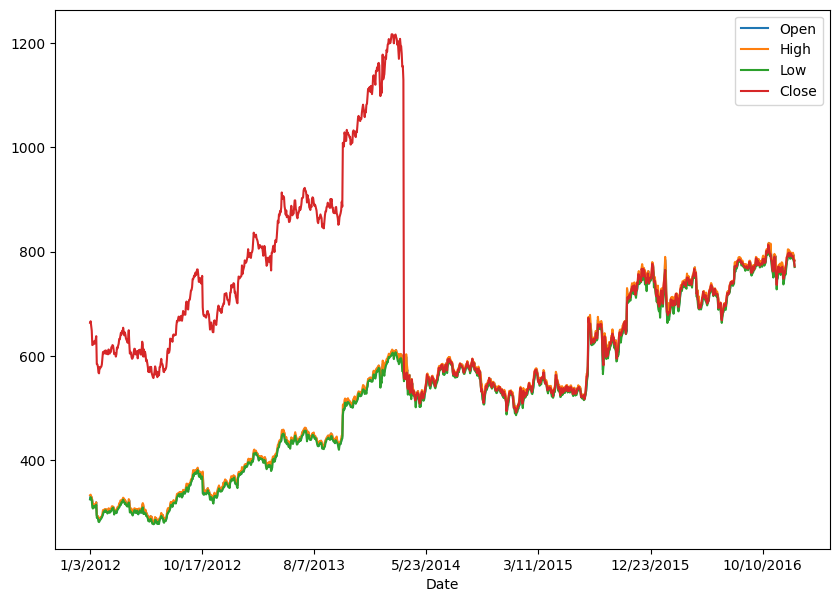

In [55]:
df.plot(x = "Date", y = ["Open", "High", "Low", "Close"], figsize = (10, 7))

<Axes: xlabel='Date', ylabel='Trade Volume'>

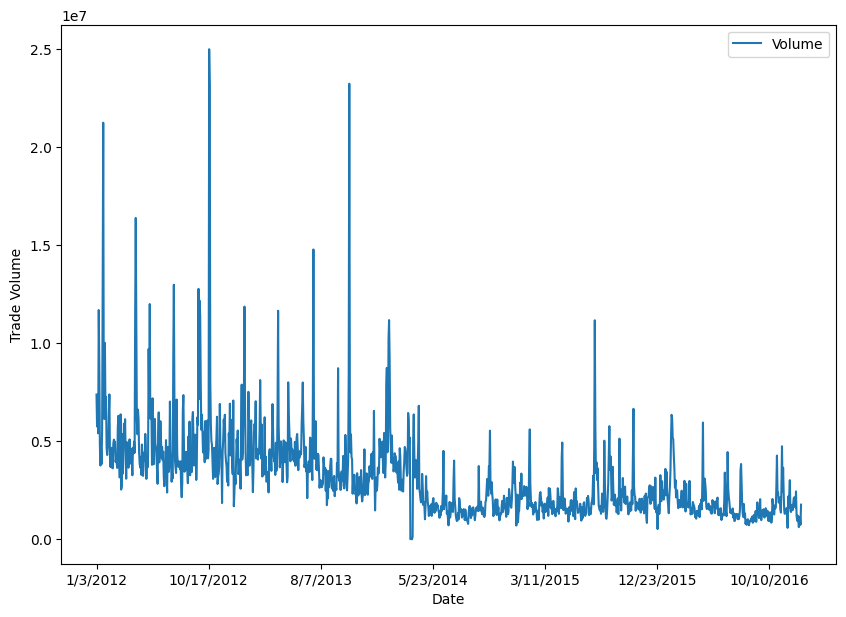

In [56]:
df.plot(x = "Date", y = "Volume", figsize = (10, 7), ylabel="Trade Volume")

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

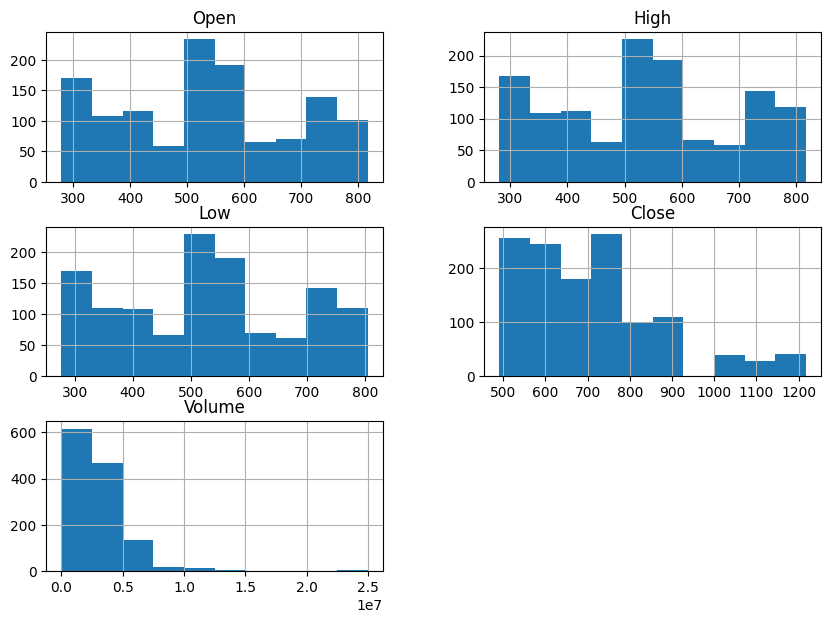

In [57]:
df.hist(figsize=(10, 7))

In [58]:
scaler = MinMaxScaler()

data_no_date = df.drop("Date", axis = 1)

In [59]:
scaled_data = pd.DataFrame(scaler.fit_transform(data_no_date))

In [60]:
scaled_data

,0,1,2,3,4
0,0.085814,0.096401,0.090449,0.237573,0.295258
1,0.097012,0.098344,0.098235,0.241514,0.229936
2,0.094334,0.092517,0.094086,0.228781,0.263612
3,0.091562,0.088819,0.088006,0.216419,0.216179
4,0.079842,0.076718,0.061070,0.178548,0.467797
...,...,...,...,...,...
1253,0.952043,0.955292,0.966169,0.411656,0.024650
1254,0.951633,0.964853,0.966889,0.413916,0.031286
1255,0.957251,0.958074,0.958441,0.404958,0.045891
1256,0.937960,0.942574,0.950333,0.401844,0.029491


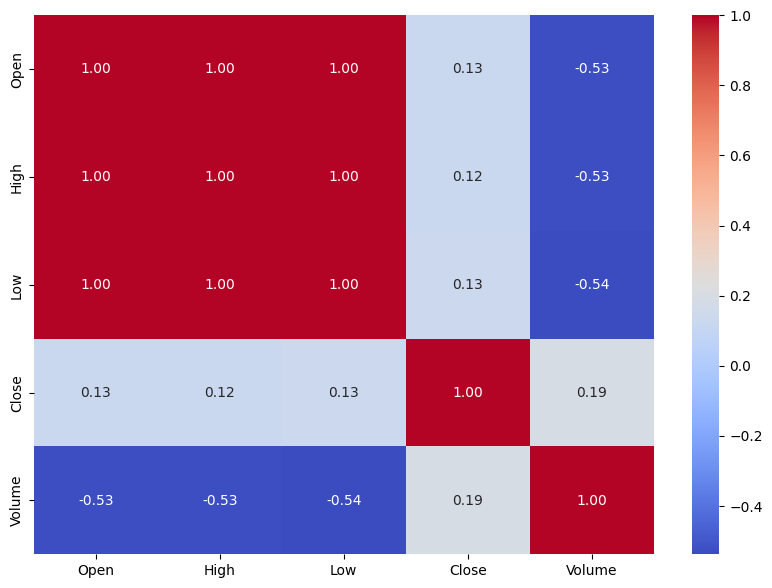

In [61]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.drop("Date", axis = 1).corr(), annot = True, cmap="coolwarm", fmt=".2f")
plt.show()

In [62]:
scaled_data = scaled_data.drop([0, 2, 3], axis =1)

In [66]:
def seq_to_multivariate(seq, past_n, future_n):
    x = []
    y = []

    for window in range(len(seq)):
        past_end = window + past_n
        future_end = past_end + future_n

        if future_end > len(seq):
            break

        x.append(seq[window: past_end, :])
        y.append(seq[past_end:future_end, -1])

    return np.array(x), np.array(y)

In [64]:
step_size = 60
scaled_data = scaled_data.to_numpy()



In [65]:
scaled_data.shape

(1258, 2)

In [67]:
x, y = seq_to_multivariate(scaled_data, step_size, 1)

In [69]:
y = y[:, 0]

In [70]:
y

array([0.15438526, 0.18545455, 0.18331998, ..., 0.04589107, 0.02949139,
       0.07056868])

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((958, 60, 2), (240, 60, 2), (958,), (240,))

In [72]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(612, input_shape=(step_size, 2)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [73]:
model.compile(optimizer="adam", loss = "mae", metrics=['mae'])

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 612)               1505520   
                                                                 
 dense (Dense)               (None, 50)                30650     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1540281 (5.88 MB)
Trainable params: 1540281 (5.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
history = model.fit(x_train, y_train, epochs=250, batch_size=32, verbose=2, validation_data=(x_test, y_test))

Epoch 1/250


30/30 - 9s - loss: 0.0497 - mae: 0.0497 - val_loss: 0.0423 - val_mae: 0.0423 - 9s/epoch - 290ms/step
Epoch 2/250
30/30 - 6s - loss: 0.0371 - mae: 0.0371 - val_loss: 0.0405 - val_mae: 0.0405 - 6s/epoch - 196ms/step
Epoch 3/250
30/30 - 6s - loss: 0.0352 - mae: 0.0352 - val_loss: 0.0404 - val_mae: 0.0404 - 6s/epoch - 209ms/step
Epoch 4/250
30/30 - 6s - loss: 0.0339 - mae: 0.0339 - val_loss: 0.0371 - val_mae: 0.0371 - 6s/epoch - 199ms/step
Epoch 5/250
30/30 - 6s - loss: 0.0335 - mae: 0.0335 - val_loss: 0.0364 - val_mae: 0.0364 - 6s/epoch - 198ms/step
Epoch 6/250
30/30 - 6s - loss: 0.0331 - mae: 0.0331 - val_loss: 0.0370 - val_mae: 0.0370 - 6s/epoch - 202ms/step
Epoch 7/250
30/30 - 6s - loss: 0.0336 - mae: 0.0336 - val_loss: 0.0385 - val_mae: 0.0385 - 6s/epoch - 189ms/step
Epoch 8/250
30/30 - 6s - loss: 0.0336 - mae: 0.0336 - val_loss: 0.0362 - val_mae: 0.0362 - 6s/epoch - 198ms/step
Epoch 9/250
30/30 - 6s - loss: 0.0327 - mae: 0.0327 - val_loss: 0.0365 - val_mae: 0.0365 - 6s/

<Axes: >

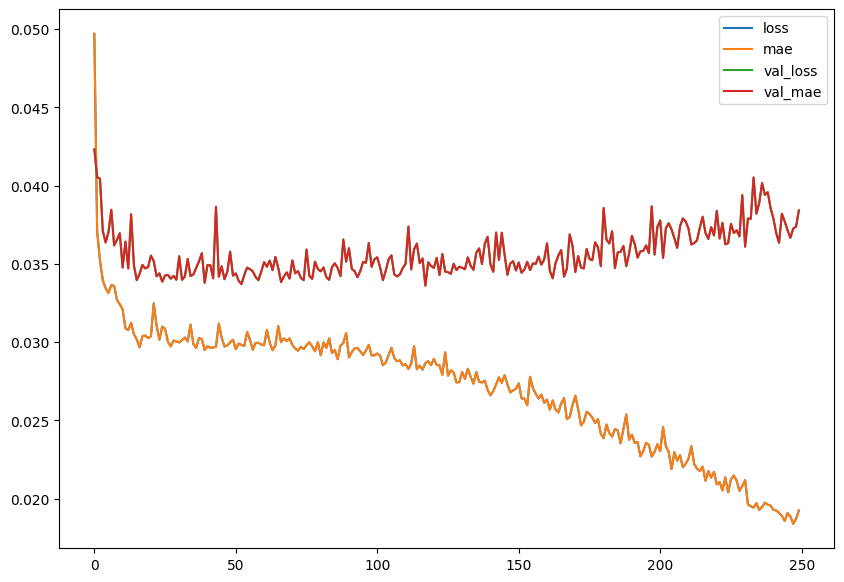

In [76]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [77]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 43ms/step - loss: 0.0384 - mae: 0.0384


[0.038412418216466904, 0.038412418216466904]

In [78]:
y_pred = model.predict(x_test)

8/8 [==============================] - 1s 49ms/step


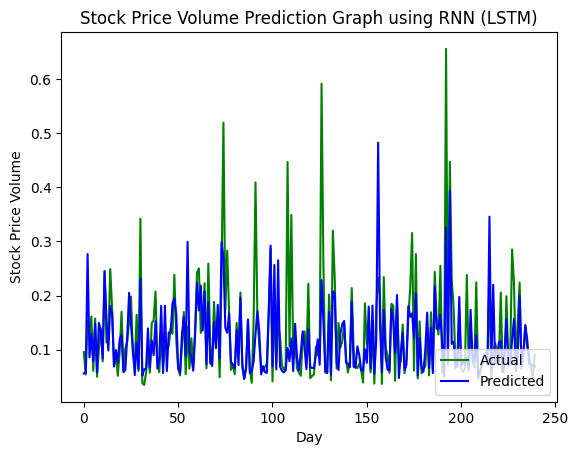

<Figure size 1000x700 with 0 Axes>

In [79]:
plt.plot(y_test, c = "green")
plt.plot(y_pred, c = "blue")
plt.xlabel('Day')
plt.ylabel('Stock Price Volume')
plt.title('Stock Price Volume Prediction Graph using RNN (LSTM)')
plt.legend(['Actual','Predicted'], loc = 'lower right')
plt.figure(figsize=(10,7))
plt.show()